# DETECCIÓN DE OUTLIERS

In [1]:
import numpy as np # calculos avanzados
import pandas as pd # funciones para el analisis de datos
import matplotlib.pyplot as plt # gráficos

%matplotlib inline

In [2]:
rios = pd.read_csv('Rios.csv')
rios

,Rio,Millas
0,1,735
1,2,320
2,3,325
3,4,392
4,5,524
...,...,...
136,137,720
137,138,270
138,139,430
139,140,671


In [8]:
rios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rio     141 non-null    int64
 1   Millas  141 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


In [9]:
rios.describe()

,Rio,Millas
count,141.000000,141.000000
mean,71.000000,591.184397
std,40.847277,493.870842
min,1.000000,135.000000
25%,36.000000,310.000000
50%,71.000000,425.000000
75%,106.000000,680.000000
max,141.000000,3710.000000


In [3]:
# Obtenemos el histograma para ver cómo están distribuidos los valores

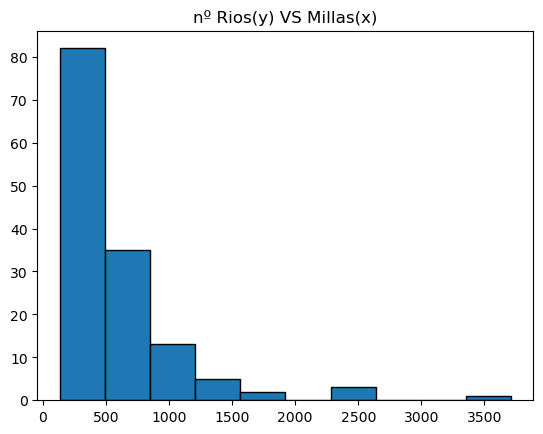

In [12]:
plt.title('nº Rios(y) VS Millas(x)')
plt.hist(rios["Millas"], edgecolor = 'black', linewidth = 1)
plt.show()

In [13]:
# hacemos un gráfico de Caja y Bigotes para ver los outliers

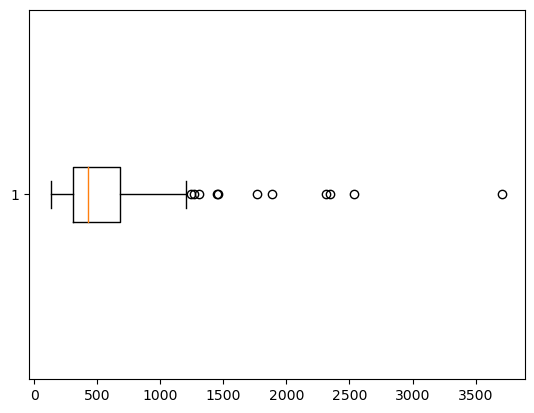

In [14]:
plt.boxplot(rios["Millas"], vert = False)
plt.show()

In [15]:
# calculamos los estadísticos para el BoxPlot del objeto "rios"

In [16]:
Q1 = rios['Millas'].quantile(0.25) # Valor por debajo del cual se encuentra el 25% de los datos
print("Primer Cuartil", Q1) # Extremo izquierdo de la caja

Q3 = rios['Millas'].quantile(0.75) # Valor por debajo del cual se encuentra el 75% de los datos
print("Tercer Cuartil", Q3) # Extremo derecho de la caja

IQR = Q3 - Q1 # Este valor nos será util para ver qué valores son outliers y cuales NO
print("Rango Intercuartil", IQR) 

Mediana = rios['Millas'].median()
print("Mediana", Mediana) # Linea roja que se ubica dentro de la caja
 
valor_minimo = rios['Millas'].min()
print("Valor Minimo", valor_minimo)

valor_maximo = rios['Millas'].max()
print("Valor Máximo", valor_maximo)



Primer Cuartil 310.0
Tercer Cuartil 680.0
Rango Intercuartil 370.0
Mediana 425.0
Valor Minimo 135
Valor Máximo 3710


In [17]:
# Calculamos los valores de los bigotes inferior y superior

In [18]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_calculado \n", BS_Calculado)

BI_Calculado 
 -245.0
BS_calculado 
 1235.0


In [19]:
# UBICAMOS LAS FILAS EN LAS QUE SE ENCUENTRAN LOS OUTLIERS

In [20]:
ubicacion_outliers = (rios['Millas'] < BI_Calculado) | (rios['Millas'] > BS_Calculado)
print("n\ Ubicación de Outliers \n", ubicacion_outliers)

n\ Ubicación de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
136    False
137    False
138    False
139    False
140     True
Name: Millas, Length: 141, dtype: bool


In [21]:
outliers = rios[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
      Rio  Millas
6      7    1459
22    23    1450
24    25    1243
65    66    2348
67    68    3710
68    69    2315
69    70    2533
82    83    1306
97    98    1270
100  101    1885
140  141    1770


In [22]:
# Ordenamos los outliers

In [23]:
Outliers_Ordenados = outliers.sort_values("Millas")
Outliers_Ordenados

,Rio,Millas
24,25,1243
97,98,1270
82,83,1306
22,23,1450
6,7,1459
140,141,1770
100,101,1885
68,69,2315
65,66,2348
69,70,2533


In [24]:
# Nos quedamos solamente con los valores que NO son outliers

In [26]:
ubicacion_sin_out = (rios['Millas'] >= BI_Calculado) & (rios['Millas'] <= BS_Calculado)
sin_outliers = rios[ubicacion_sin_out]
sin_outliers

,Rio,Millas
0,1,735
1,2,320
2,3,325
3,4,392
4,5,524
...,...,...
135,136,500
136,137,720
137,138,270
138,139,430


In [27]:
# Hacemos gráfico de caja y bigotes para ver si el objeto "sin_outliers" ya no tiene outliers

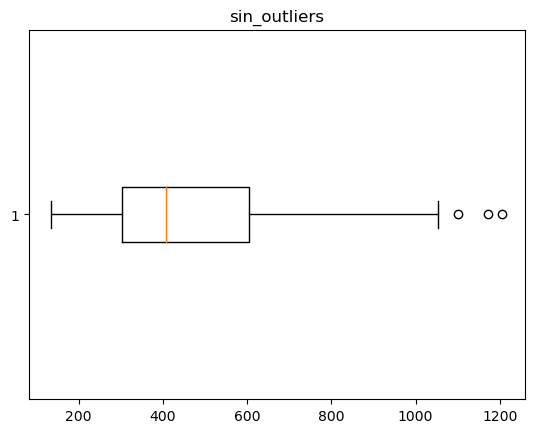

In [28]:
plt.title("sin_outliers")
plt.boxplot(sin_outliers["Millas"], vert=False)
plt.show()

In [29]:
# HAY QUE REPETIR EL PROCESO ANTERIOR DE TRATAMIENTO DE OUTLIERS HASTA QUE NO QUEDEN OUTLIERS 
# EN LA GRÁFICA!!!